In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [ ]:
path = '/content/drive/MyDrive/EXCEL_12/'

In [ ]:
df_12_1 = pd.read_excel(path + "EXCEL_12_1.xlsx")
df_12_2 = pd.read_excel(path + "EXCEL_12_2.xlsx")
df_12_3 = pd.read_excel(path + "EXCEL_12_3.xlsx")
df_12_4 = pd.read_excel(path + "EXCEL_12_4.xlsx")
df_12_5 = pd.read_excel(path + "EXCEL_12_5.xlsx")
df_12_6 = pd.read_excel(path + "EXCEL_12_6.xlsx")

In [ ]:
%whos

Variable   Type         Data/Info
---------------------------------
df_12_1    DataFrame          codMuni  CCAA      <...>n[3931 rows x 11 columns]
df_12_2    DataFrame          codMuni    DISTHOSP<...>\n[3931 rows x 2 columns]
df_12_3    DataFrame          codMuni     DISTFAR<...>\n[3931 rows x 2 columns]
df_12_4    DataFrame          codMuni     DISTCED<...>\n[3931 rows x 2 columns]
df_12_5    DataFrame          codMuni     DISTCUR<...>\n[3931 rows x 2 columns]
df_12_6    DataFrame          codMuni   DISTATPRI<...>\n[3931 rows x 2 columns]
drive      module       <module 'google.colab.dri<...>s/google/colab/drive.py'>
np         module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
path       str          /content/drive/MyDrive/EXCEL_12/
pd         module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>


In [ ]:
my_dfs = [x for x in vars().keys() if x[:2] == "df"]
for my_df in my_dfs:
  print("Shape for %s dataframe: %s" % (my_df, vars()[my_df].shape))

Shape for df_12_1 dataframe: (3931, 11)
Shape for df_12_2 dataframe: (3931, 2)
Shape for df_12_3 dataframe: (3931, 2)
Shape for df_12_4 dataframe: (3931, 2)
Shape for df_12_5 dataframe: (3931, 2)
Shape for df_12_6 dataframe: (3931, 2)


All dataframes have the same columns, ie, the same number of population_centres

In [ ]:
my_dfs = [x for x in vars().keys() if x[:2] == "df"]
for my_df in my_dfs:
  print("COLUMNS AND TYPES FOR %s:" % (my_df))
  d = dict(vars()[my_df].dtypes)
  for col in d.keys():
    print(col + " -> " + str(d[col]))
  print("\n")

COLUMNS AND TYPES FOR df_12_1:
codMuni -> int64
CCAA -> int64
Nombre -> object
CodProv -> int64
NombreProvincia -> object
NombreCCAA -> object
NHOSPI -> int64
NFARMA -> object
NCENTEDUC -> object
NATURGHOSP -> object
NATPRIMARIA -> object


COLUMNS AND TYPES FOR df_12_2:
codMuni -> int64
DISTHOSPIT -> float64


COLUMNS AND TYPES FOR df_12_3:
codMuni -> int64
DISTFARMA -> float64


COLUMNS AND TYPES FOR df_12_4:
codMuni -> int64
DISTCEDUC -> float64


COLUMNS AND TYPES FOR df_12_5:
codMuni -> int64
DISTCURGH -> float64


COLUMNS AND TYPES FOR df_12_6:
codMuni -> int64
DISTATPRIM -> float64




In [ ]:
def codmun_to_str(l):
  res = list(map(lambda x: "0"+x if len(x)==4 else x, list(l.astype(str))))
  return res

In [ ]:
df_12_1["codMuni"] = codmun_to_str(df_12_1["codMuni"])
df_12_2["codMuni"] = codmun_to_str(df_12_2["codMuni"])
df_12_3["codMuni"] = codmun_to_str(df_12_3["codMuni"])
df_12_4["codMuni"] = codmun_to_str(df_12_4["codMuni"])
df_12_5["codMuni"] = codmun_to_str(df_12_5["codMuni"])
df_12_6["codMuni"] = codmun_to_str(df_12_6["codMuni"])

In [ ]:
for my_df in my_dfs:
  print("COLUMNS AND TYPES FOR %s:" % (my_df))
  d = dict(vars()[my_df].dtypes)
  for col in d.keys():
    if col == "codMuni":
      print(col + " -> " + str(d[col]))
  print("\n")

COLUMNS AND TYPES FOR df_12_1:
codMuni -> object


COLUMNS AND TYPES FOR df_12_2:
codMuni -> object


COLUMNS AND TYPES FOR df_12_3:
codMuni -> object


COLUMNS AND TYPES FOR df_12_4:
codMuni -> object


COLUMNS AND TYPES FOR df_12_5:
codMuni -> object


COLUMNS AND TYPES FOR df_12_6:
codMuni -> object




In [ ]:
from functools import reduce
list_df = [df_12_1, df_12_2, df_12_3, df_12_4, df_12_5, df_12_6]
res = reduce(lambda df1, df2: pd.merge(df1, df2, on = 'codMuni'), list_df)

In [ ]:
id_cols  = res.columns[:6]
exp_cols = res.columns[6:]

In [ ]:
res[exp_cols].dtypes

NHOSPI           int64
NFARMA          object
NCENTEDUC       object
NATURGHOSP      object
NATPRIMARIA     object
DISTHOSPIT     float64
DISTFARMA      float64
DISTCEDUC      float64
DISTCURGH      float64
DISTATPRIM     float64
dtype: object

In [ ]:
res[exp_cols] = res[exp_cols].apply(lambda col: pd.to_numeric(col, errors = 'coerce'))

In [ ]:
res.dtypes

codMuni             object
CCAA                 int64
Nombre              object
CodProv              int64
NombreProvincia     object
NombreCCAA          object
NHOSPI               int64
NFARMA             float64
NCENTEDUC          float64
NATURGHOSP         float64
NATPRIMARIA        float64
DISTHOSPIT         float64
DISTFARMA          float64
DISTCEDUC          float64
DISTCURGH          float64
DISTATPRIM         float64
dtype: object

In [ ]:
for col in exp_cols:
  n = res[col].isna().sum()
  print("Missing values for column %s: %s" % (col, n))

Missing values for column NHOSPI: 0
Missing values for column NFARMA: 3035
Missing values for column NCENTEDUC: 3175
Missing values for column NATURGHOSP: 3445
Missing values for column NATPRIMARIA: 217
Missing values for column DISTHOSPIT: 0
Missing values for column DISTFARMA: 0
Missing values for column DISTCEDUC: 0
Missing values for column DISTCURGH: 0
Missing values for column DISTATPRIM: 0


In [ ]:
# Contar número de hospitales
import collections
nhospi = collections.Counter(res["NHOSPI"])
nhospi

Counter({0: 3856,
         1: 46,
         2: 8,
         3: 6,
         4: 4,
         5: 3,
         6: 2,
         7: 3,
         8: 1,
         10: 1,
         15: 1})

In [ ]:
# Contar numero de farmacias
nfarma= collections.Counter(res["NFARMA"].dropna())
nfarma

Counter({1.0: 664,
         2.0: 89,
         3.0: 34,
         4.0: 31,
         5.0: 13,
         6.0: 7,
         7.0: 15,
         9.0: 5,
         10.0: 3,
         11.0: 4,
         12.0: 4,
         14.0: 2,
         15.0: 2,
         18.0: 2,
         19.0: 1,
         23.0: 1,
         25.0: 4,
         26.0: 1,
         31.0: 1,
         34.0: 1,
         36.0: 1,
         45.0: 1,
         49.0: 1,
         58.0: 1,
         61.0: 1,
         81.0: 1,
         86.0: 1,
         87.0: 1,
         88.0: 1,
         97.0: 1,
         159.0: 1,
         323.0: 1})

In [ ]:
# Contar numero de centros educativos
neduc = collections.Counter(res["NCENTEDUC"].dropna())
neduc

Counter({2.0: 400,
         4.0: 134,
         6.0: 65,
         8.0: 28,
         10.0: 24,
         12.0: 9,
         14.0: 11,
         16.0: 9,
         18.0: 13,
         20.0: 9,
         22.0: 7,
         24.0: 7,
         26.0: 2,
         28.0: 2,
         30.0: 2,
         32.0: 2,
         36.0: 4,
         40.0: 1,
         44.0: 2,
         46.0: 2,
         50.0: 3,
         62.0: 1,
         64.0: 1,
         70.0: 1,
         84.0: 1,
         88.0: 2,
         94.0: 1,
         100.0: 2,
         110.0: 1,
         116.0: 1,
         120.0: 1,
         152.0: 1,
         186.0: 1,
         194.0: 1,
         212.0: 1,
         218.0: 1,
         232.0: 1,
         252.0: 1,
         596.0: 1})

In [ ]:
# Contar centros de urgencias
nurg = collections.Counter(res["NATURGHOSP"].dropna())
nurg

Counter({1.0: 458, 2.0: 18, 3.0: 2, 4.0: 2, 5.0: 1, 6.0: 2, 11.0: 2, 27.0: 1})

In [ ]:
# Contar centros de atencion primaria
natprim = collections.Counter(res["NATPRIMARIA"].dropna())
natprim

Counter({1.0: 2783,
         2.0: 467,
         3.0: 178,
         4.0: 111,
         5.0: 54,
         6.0: 28,
         7.0: 25,
         8.0: 16,
         9.0: 16,
         10.0: 4,
         11.0: 6,
         12.0: 11,
         13.0: 5,
         15.0: 3,
         16.0: 1,
         18.0: 1,
         19.0: 2,
         23.0: 1,
         24.0: 1,
         45.0: 1})

In [ ]:
!pip install ptitprince 
import ptitprince as pt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 642 kB/s 
  Created wheel for ptitprince: filename=ptitprince-0.2.5-py3-none-any.whl size=8426 sha256=74a8a8e19173f6b9f9cf8ec6eae03a989de0fa6197f1ce27b3fe9101334a5327
  Stored in directory: /root/.cache/pip/wheels/58/a5/f2/55920bbc5d0e6fb74b2370e1e52e07c236ba7b621236ea5a81
Successfully built ptitprince


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
def raincloud_plotter(col_name):
  dy = col_name
  ort = "h"
  pal = "Blues"
  sigma = .2 # Change if desired

  f, ax = plt.subplots(figsize=(18, 9))
  pt.RainCloud(y = dy, data = res, palette = pal,
       bw = sigma,width_viol = .5, ax = ax, orient = ort)
  plt.xlabel(col_name + " (m)")
  plt.title("Raincloudplot for %s. Missing values removed." % col_name)
  plt.show()



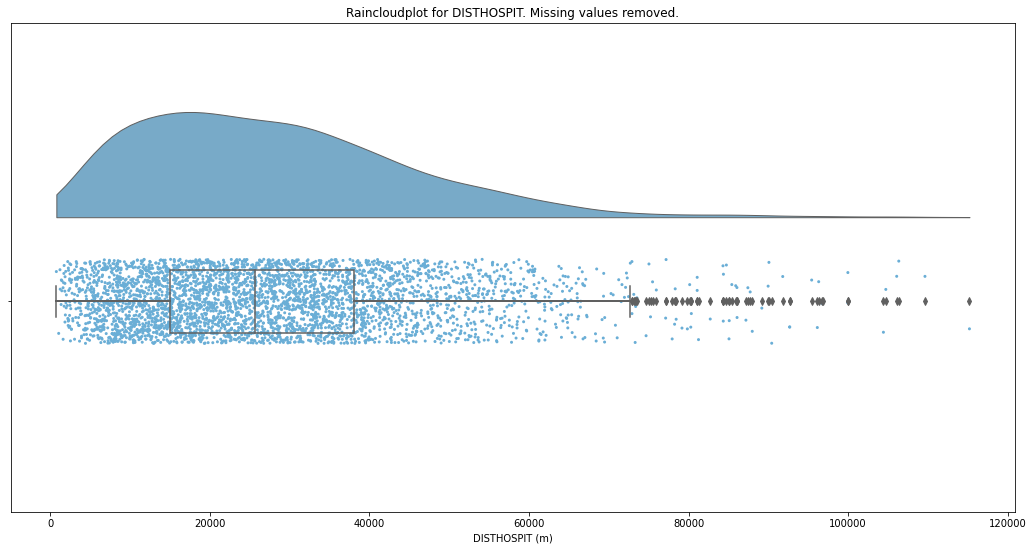

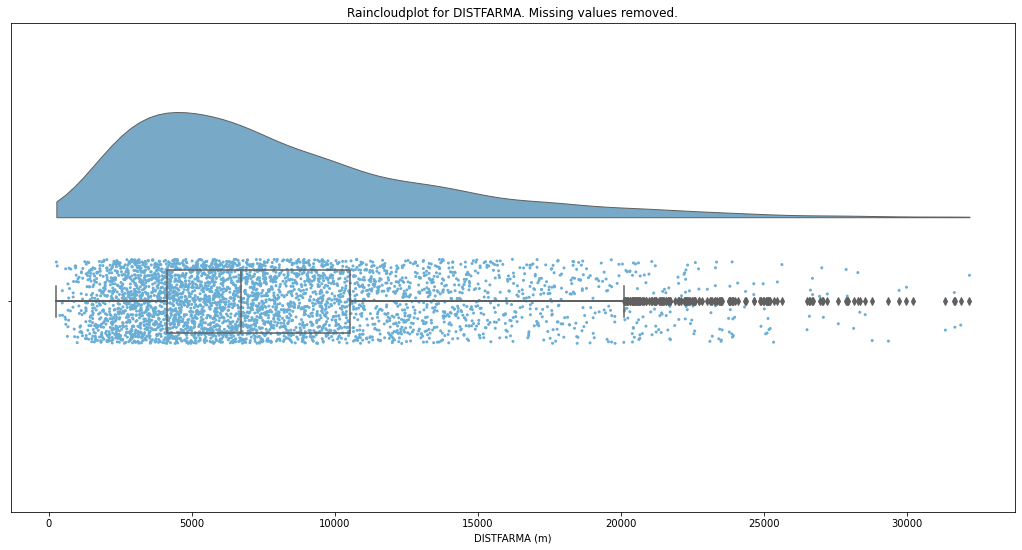

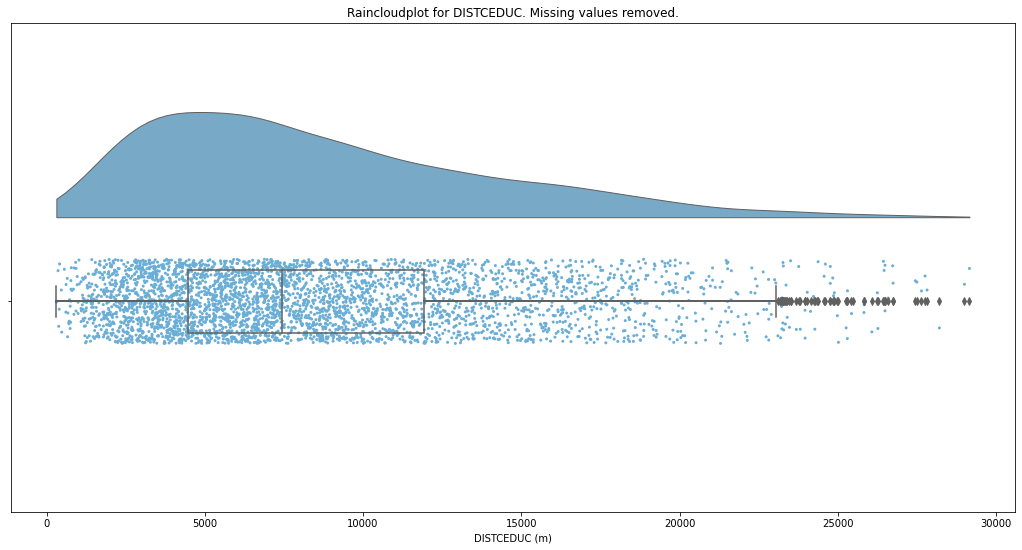

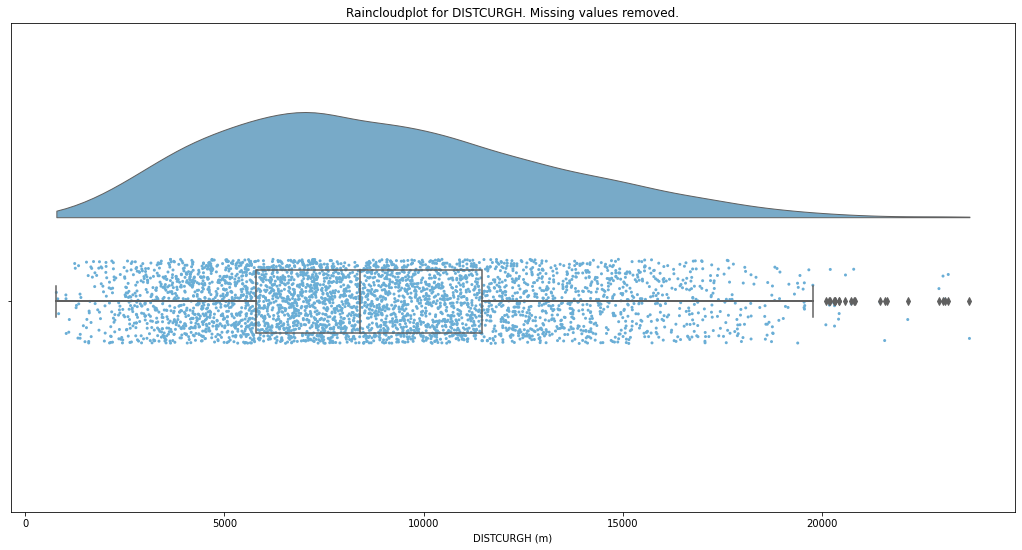

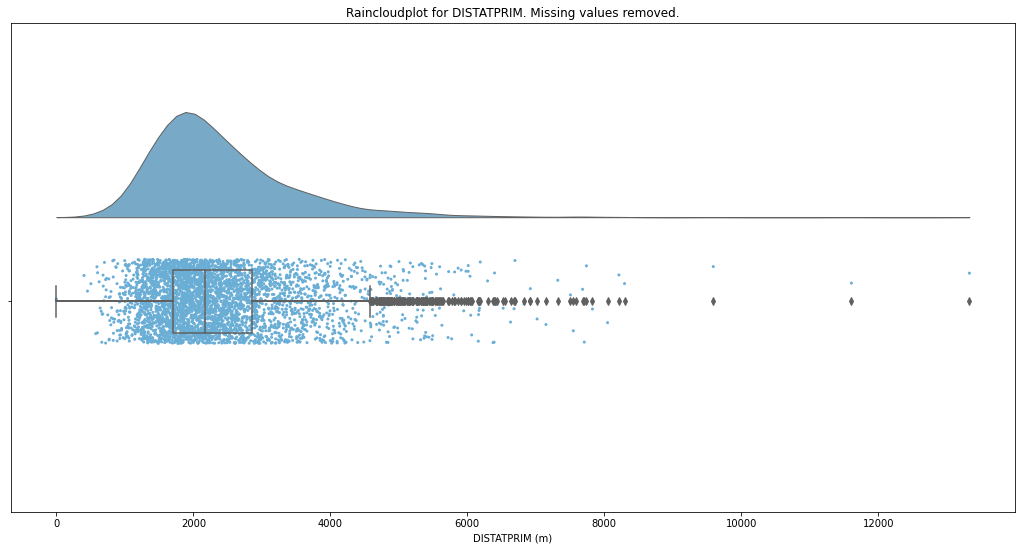

In [ ]:
for col in exp_cols[5:]:
  raincloud_plotter(col)

## PROBLEMA -> QUÉ HACER CON LS DATOS VACÍOS?
### PROBABLEMENTE SEAN 0
pero por ahora se lo dejamos al jesus del futuro

In [ ]:
res.head()

,codMuni,CCAA,Nombre,CodProv,NombreProvincia,NombreCCAA,NHOSPI,NFARMA,NCENTEDUC,NATURGHOSP,NATPRIMARIA,DISTHOSPIT,DISTFARMA,DISTCEDUC,DISTCURGH,DISTATPRIM
0,01001,16,Alegría-Dulantzi,1,Araba/Álava,País Vasco,0,1.0,2.0,NaN,1.0,13243.117265,2580.209868,2609.754306,9790.487884,2661.540327
1,01002,16,Amurrio,1,Araba/Álava,País Vasco,0,4.0,6.0,1.0,1.0,24308.144096,3647.054776,3727.201496,5442.524424,3776.221905
2,01003,16,Aramaio,1,Araba/Álava,País Vasco,0,1.0,NaN,NaN,1.0,6041.577103,2942.624937,4271.741105,8713.460459,2902.566910
3,01004,16,Artziniega,1,Araba/Álava,País Vasco,0,2.0,NaN,NaN,1.0,21149.641300,2235.326594,8617.749843,8391.313642,2101.739841
4,01006,16,Armiñón,1,Araba/Álava,País Vasco,0,NaN,NaN,NaN,NaN,10805.474597,3874.172718,3950.406180,6468.294483,3511.013481


In [ ]:
my_population_centres = [33024, 33042, 24089, 37274, 39085, 39035, 39075, 48020]
my_population_centres = [str(i) for i in my_population_centres]

In [ ]:
df_my_pc = res[res["codMuni"].isin(my_population_centres)]

In [ ]:
df_my_pc

,codMuni,CCAA,Nombre,CodProv,NombreProvincia,NombreCCAA,NHOSPI,NFARMA,NCENTEDUC,NATURGHOSP,NATPRIMARIA,DISTHOSPIT,DISTFARMA,DISTCEDUC,DISTCURGH,DISTATPRIM
1041,24089,7,León,24,León,Castilla y León,5,31.0,70.0,4.0,11.0,1704.358938,1532.529216,1262.780316,1741.294896,1041.059556
1640,33024,3,Gijón,33,Asturias,Principado de Asturias,8,49.0,252.0,11.0,15.0,4736.787301,4356.865277,1769.208098,4704.071874,3419.299945
1658,33042,3,Noreña,33,Asturias,Principado de Asturias,0,1.0,4.0,1.0,1.0,8030.180365,1809.499743,1696.439314,2114.355418,1908.441395
2142,37274,7,Salamanca,37,Salamanca,Castilla y León,3,88.0,232.0,2.0,12.0,2267.347039,901.498826,745.694993,1861.150827,1057.718249
2282,39035,6,Laredo,39,Cantabria,Cantabria,1,7.0,18.0,1.0,1.0,2266.142901,1108.264761,1129.460478,1590.443742,1535.822978
2322,39075,6,Santander,39,Cantabria,Cantabria,4,45.0,152.0,2.0,12.0,1894.517652,1031.037837,673.276467,1849.597630,984.715084
2332,39085,6,Suances,39,Cantabria,Cantabria,0,2.0,4.0,1.0,1.0,6086.627482,2111.811528,2176.339811,2249.691385,1682.295735
3222,48020,16,Bilbao,48,Bizkaia,País Vasco,10,159.0,212.0,6.0,24.0,1665.895343,750.481617,746.962975,1605.614453,934.283430


In [ ]:
df_my_pc = df_my_pc[[*["codMuni"], * df_my_pc.columns[6:]]]
df_my_pc

,codMuni,NHOSPI,NFARMA,NCENTEDUC,NATURGHOSP,NATPRIMARIA,DISTHOSPIT,DISTFARMA,DISTCEDUC,DISTCURGH,DISTATPRIM
1041,24089,5,31.0,70.0,4.0,11.0,1704.358938,1532.529216,1262.780316,1741.294896,1041.059556
1640,33024,8,49.0,252.0,11.0,15.0,4736.787301,4356.865277,1769.208098,4704.071874,3419.299945
1658,33042,0,1.0,4.0,1.0,1.0,8030.180365,1809.499743,1696.439314,2114.355418,1908.441395
2142,37274,3,88.0,232.0,2.0,12.0,2267.347039,901.498826,745.694993,1861.150827,1057.718249
2282,39035,1,7.0,18.0,1.0,1.0,2266.142901,1108.264761,1129.460478,1590.443742,1535.822978
2322,39075,4,45.0,152.0,2.0,12.0,1894.517652,1031.037837,673.276467,1849.597630,984.715084
2332,39085,0,2.0,4.0,1.0,1.0,6086.627482,2111.811528,2176.339811,2249.691385,1682.295735
3222,48020,10,159.0,212.0,6.0,24.0,1665.895343,750.481617,746.962975,1605.614453,934.283430


In [ ]:
# Pasamos a kilometros
df_my_pc["DISTHOSPIT"] = df_my_pc["DISTHOSPIT"] / 1000
df_my_pc["DISTFARMA"]  = df_my_pc["DISTFARMA"]  / 1000
df_my_pc["DISTCEDUC"]  = df_my_pc["DISTCEDUC"]  / 1000
df_my_pc["DISTCURGH"]  = df_my_pc["DISTCURGH"]  / 1000
df_my_pc["DISTATPRIM"] = df_my_pc["DISTATPRIM"] / 1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df_my_pc

,codMuni,NHOSPI,NFARMA,NCENTEDUC,NATURGHOSP,NATPRIMARIA,DISTHOSPIT,DISTFARMA,DISTCEDUC,DISTCURGH,DISTATPRIM
1041,24089,5,31.0,70.0,4.0,11.0,1.704359,1.532529,1.262780,1.741295,1.041060
1640,33024,8,49.0,252.0,11.0,15.0,4.736787,4.356865,1.769208,4.704072,3.419300
1658,33042,0,1.0,4.0,1.0,1.0,8.030180,1.809500,1.696439,2.114355,1.908441
2142,37274,3,88.0,232.0,2.0,12.0,2.267347,0.901499,0.745695,1.861151,1.057718
2282,39035,1,7.0,18.0,1.0,1.0,2.266143,1.108265,1.129460,1.590444,1.535823
2322,39075,4,45.0,152.0,2.0,12.0,1.894518,1.031038,0.673276,1.849598,0.984715
2332,39085,0,2.0,4.0,1.0,1.0,6.086627,2.111812,2.176340,2.249691,1.682296
3222,48020,10,159.0,212.0,6.0,24.0,1.665895,0.750482,0.746963,1.605614,0.934283


In [ ]:
from google.colab import files
df_my_pc.to_csv('df_12.csv') 
files.download('df_12.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>